# Merging volumentric ROI measures and freesurfer surface measures.
- Cortical thickness/volume/aseg/wmparc data generated by "../tab_data/freesurfer_stats2table.sh" from fMRIPrep_20.2.0 freesurfer_6.0.1
- Cerebellar segmetations in both SUIT34 and MDTB10 spaces.
- Uses participants data (../tab_data/MNI_subjects.list) as target to join, all NaN values droped;
## Cohorts
- MNI ET/NC (sub-0073(# only left brain NC), sub-0064(# super large head NC with freesurfer problems) have been removed 
## Parcellations
- Distreux
- DKT
## Results
- Distreux: ../tab_data/'freesurfer-preped_MNI.csv'
- DKT:      ../tab_data/ADNI-PPMI_DKT-cere_preped.csv (NOT READY)

In [1]:
## Preprocessing of MNI dataset freesurfer outputs
## Merging all PD/ET/NC freesurfer outputs into one table. /root/tab_data/all_freesurfer_out.csv
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_dir = Path("/codes/tab_data")
sub_list_file = data_dir/'MNI_subjects.list'
sub_list = pd.read_csv(sub_list_file, sep='\t', header=0, index_col=0)

# reading freesurfer results
FS_DIR   = data_dir/'freesurfer_output_20.2.0'
GROUPS   = ['PD','ET','NC']
n_groups = len(GROUPS);
group_data={};
# output file
res_file = data_dir/'MNI_Des-cere_preped.csv'

for i_group in range(n_groups):
    """
    Loop to gather all the freesurfer outputs for ET/PD/NC group.
    Output: all_data (dataframe).
    """
    print('Reading ' , GROUPS[i_group], ' freesurfer stats data...')
    sub_cortical_file = FS_DIR/GROUPS[i_group]/'aseg_stats.txt';
    wm_file = FS_DIR/GROUPS[i_group]/'wmparc_stats.txt'; 
    lh_area_file      = FS_DIR/GROUPS[i_group]/'lh.a2009s.area.txt';      rh_area_file      = FS_DIR/GROUPS[i_group]/'rh.a2009s.area.txt';
    lh_meancurv_file  = FS_DIR/GROUPS[i_group]/'lh.a2009s.meancurv.txt';  rh_meancurv_file  = FS_DIR/GROUPS[i_group]/'rh.a2009s.meancurv.txt';
    lh_thickness_file = FS_DIR/GROUPS[i_group]/'lh.a2009s.thickness.txt'; rh_thickness_file = FS_DIR/GROUPS[i_group]/'rh.a2009s.thickness.txt';
    lh_volume_file    = FS_DIR/GROUPS[i_group]/'lh.a2009s.volume.txt';    rh_volume_file    = FS_DIR/GROUPS[i_group]/'rh.a2009s.volume.txt';
    ## drop_list
    aseg_drop = ["EstimatedTotalIntraCranialVol"];
    wm_drop = ["MaskVol", "EstimatedTotalIntraCranialVol", "CerebralWhiteMatterVol", "rhCerebralWhiteMatterVol", "lhCerebralWhiteMatterVol"];
    area_drop1 = ["BrainSegVolNotVent"];                   area_drop2 = ["BrainSegVolNotVent", "eTIV"];
    meancurv_drop1  = ["BrainSegVolNotVent", "eTIV"];  meancurv_drop2 = ["BrainSegVolNotVent", "eTIV"];
    thickness_drop1 = ["BrainSegVolNotVent", "eTIV"]; thickness_drop2 = ["BrainSegVolNotVent", "eTIV"];
    volume_drop1    = ["BrainSegVolNotVent", "eTIV"];    volume_drop2 = ["BrainSegVolNotVent", "eTIV"];
    ##
    subcortical_tab  = pd.read_csv(sub_cortical_file, sep='\t', header=0, index_col=0); subcortical_tab.drop(aseg_drop, axis=1, inplace=True);
    res    = sub_list.join(subcortical_tab, how='left');
    wm_tab = pd.read_csv(wm_file, sep='\t', header=0, index_col=0); wm_tab.drop(wm_drop, axis=1, inplace=True);
    res1   = res.join(wm_tab, how='left');
    lh_area_tab = pd.read_csv(lh_area_file, sep='\t', header=0, index_col=0); lh_area_tab.drop(area_drop1, axis=1, inplace=True);
    rh_area_tab = pd.read_csv(rh_area_file, sep='\t', header=0, index_col=0); rh_area_tab.drop(area_drop2, axis=1, inplace=True);
    res2 = res1.join(lh_area_tab, how='left'); res3 = res2.join(rh_area_tab, how='left');
    lh_meancurv_tab = pd.read_csv(lh_meancurv_file, sep='\t', header=0, index_col=0); lh_meancurv_tab.drop(meancurv_drop1, axis=1, inplace=True);
    rh_meancurv_tab = pd.read_csv(rh_meancurv_file, sep='\t', header=0, index_col=0); rh_meancurv_tab.drop(meancurv_drop2, axis=1, inplace=True);
    res4 = res3.join(lh_meancurv_tab, how='left'); res5 = res4.join(rh_meancurv_tab, how='left');
    lh_thickness_tab = pd.read_csv(lh_thickness_file, sep='\t', header=0, index_col=0); lh_thickness_tab.drop(thickness_drop1, axis=1, inplace=True);
    rh_thickness_tab = pd.read_csv(rh_thickness_file, sep='\t', header=0, index_col=0); rh_thickness_tab.drop(thickness_drop2, axis=1, inplace=True);
    res6 = res5.join(lh_thickness_tab, how='left'); res7 = res6.join(rh_thickness_tab, how='left');
    lh_volume_tab = pd.read_csv(lh_volume_file, sep='\t', header=0, index_col=0); lh_volume_tab.drop(volume_drop1, axis=1, inplace=True);
    rh_volume_tab = pd.read_csv(rh_volume_file, sep='\t', header=0, index_col=0); rh_volume_tab.drop(volume_drop2, axis=1, inplace=True);
    res8 = res7.join(lh_volume_tab, how='left'); res9 = res8.join(rh_volume_tab, how='left');
    group_data[GROUPS[i_group]]=res9[res9['diagnosis']==GROUPS[i_group]]
all_data = pd.concat([group_data['PD'], group_data['ET'], group_data['NC']])
all_data['group']=all_data['diagnosis']; all_data=all_data.drop(columns=['diagnosis']);
all_data['site']='mni_001'
for x in GROUPS:
    print(x , len(all_data[all_data["group"]==x]))

Reading  PD  freesurfer stats data...
Reading  ET  freesurfer stats data...
Reading  NC  freesurfer stats data...
PD 0
ET 38
NC 32


In [2]:
## adding cerebellar measures from SUIT software in both SUIT space and MDTB space.
#SUIT space
suit_label_file  = data_dir/'atlas'/'Lobules-SUIT.nii.lut'
suit_res_file = data_dir/'res_MNI_SUIT34.csv'
suit_res_df = pd.read_csv(suit_res_file, sep=',', header=None, index_col=None)
suit_label_df = pd.read_csv(suit_label_file, sep=' ', header=None, index_col=None); 
suit_res_df.columns=suit_label_df.iloc[:,7];suit_res_df.index=all_data.index;
suit_res_df['suit_total']=suit_res_df.sum(axis=1)
all_data = all_data.join(suit_res_df, how='left');  
#MDTB space
MDTB_res_file = data_dir/'res_MNI_MDTB10.csv'
MDTB_res_df = pd.read_csv(MDTB_res_file, sep=',', header=None, index_col=None)
MDTB_res_df.columns=['MDTB_'+str(x+1) for x in range(10)]; MDTB_res_df.index=all_data.index;
MDTB_res_df['MDTB_total']=MDTB_res_df.sum(axis=1)
all_data = all_data.join(MDTB_res_df, how='left')
##Fixing all the format problems: 1. All '-' are replaced by '_'; 
all_data.index   = [x.replace('-','_') for x in all_data.index]
all_data.columns = [x.replace('-','_') for x in all_data.columns]

In [3]:
SUIT_labels =['Left_I_IV','Right_I_IV','Left_V','Right_V','Left_VI','Vermis_VI','Right_VI','Left_CrusI','Vermis_CrusI','Right_CrusI','Left_CrusII','Vermis_CrusII','Right_CrusII','Left_VIIb','Vermis_VIIb','Right_VIIb','Left_VIIIa','Vermis_VIIIa','Right_VIIIa','Left_VIIIb','Vermis_VIIIb','Right_VIIIb','Left_IX','Vermis_IX','Right_IX','Left_X','Vermis_X','Right_X','Left_Dentate','Right_Dentate','Left_Interposed','Right_Interposed','Left_Fastigial','Right_Fastigial'];
SUIT_labels = [ x.replace('-','_') for x in SUIT_labels]
SUIT_l_labels =['Left_I_IV',  'Left_V', 'Left_VI', 'Left_CrusI', 'Left_CrusII', 'Left_VIIb', 'Left_VIIIa', 'Left_VIIIb', 'Left_IX', 'Left_X', 'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'];
SUIT_r_labels =['Right_I_IV','Right_V','Right_VI','Right_CrusI','Right_CrusII','Right_VIIb','Right_VIIIa','Right_VIIIb','Right_IX','Right_X','Right_Dentate','Right_Interposed','Right_Fastigial'];
SUIT_v_labels =['Vermis_VI', 'Vermis_CrusI', 'Vermis_CrusII', 'Vermis_VIIb', 'Vermis_VIIIa','Vermis_VIIIb', 'Vermis_IX', 'Vermis_X'];

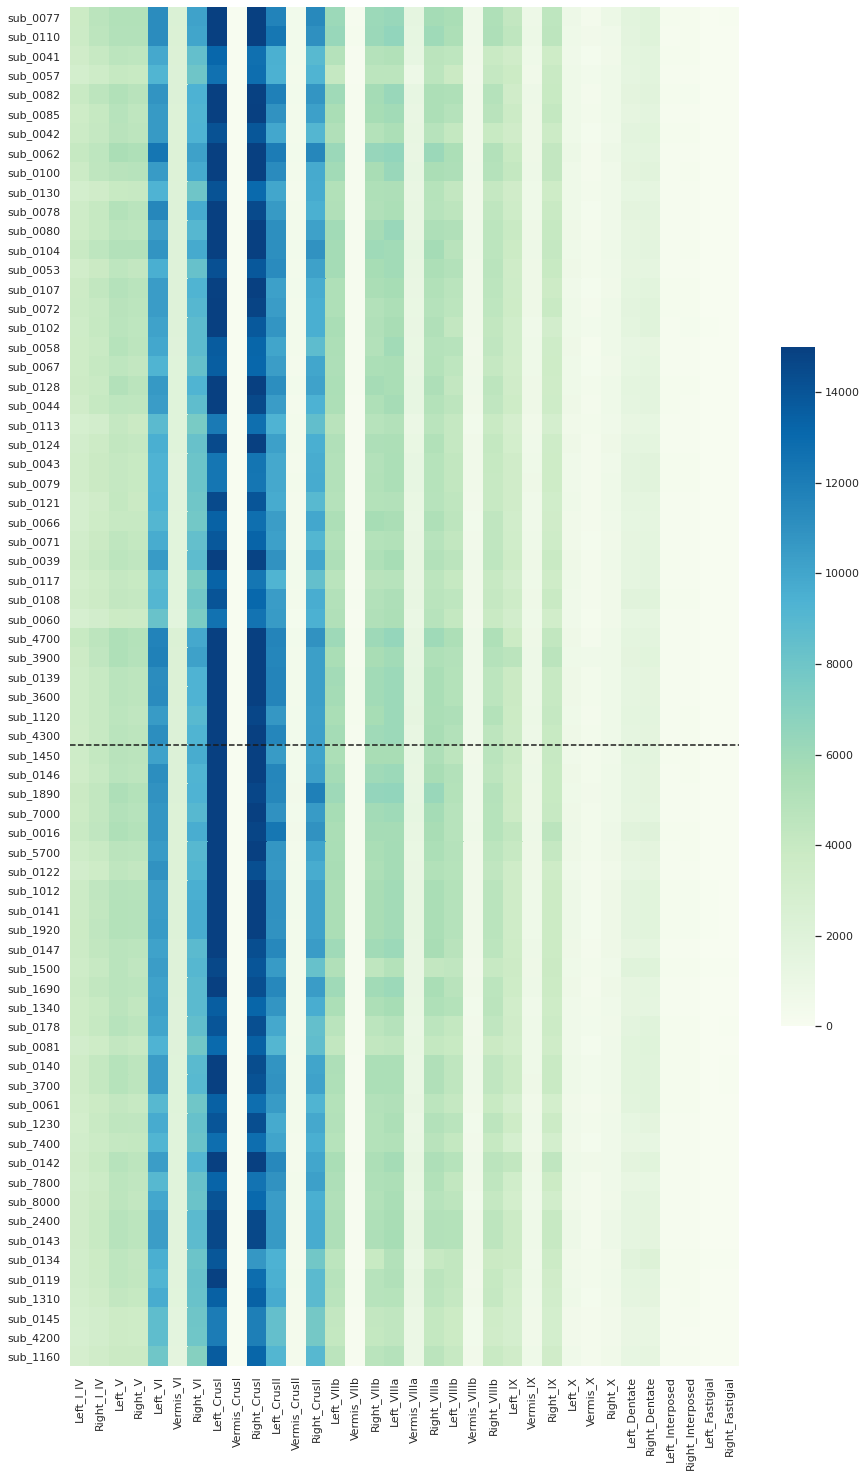

In [4]:
plot_df = all_data.copy()
vis_list=SUIT_labels;
# sort by age
plot_df = plot_df.sort_values(['group','Vermis_VI','age'], ascending=False)
plot_df = plot_df[vis_list]
sns.set(font_scale=1)
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(15, 25))
    #sns.color_palette("cubehelix", as_cmap=True)
    g = sns.heatmap(plot_df,cbar_kws={"shrink": .5}, cmap="GnBu", vmin=0, vmax=15000) # , 
    plt.axhline(len(all_data[all_data["group"]=='ET']), ls='--', c='k')

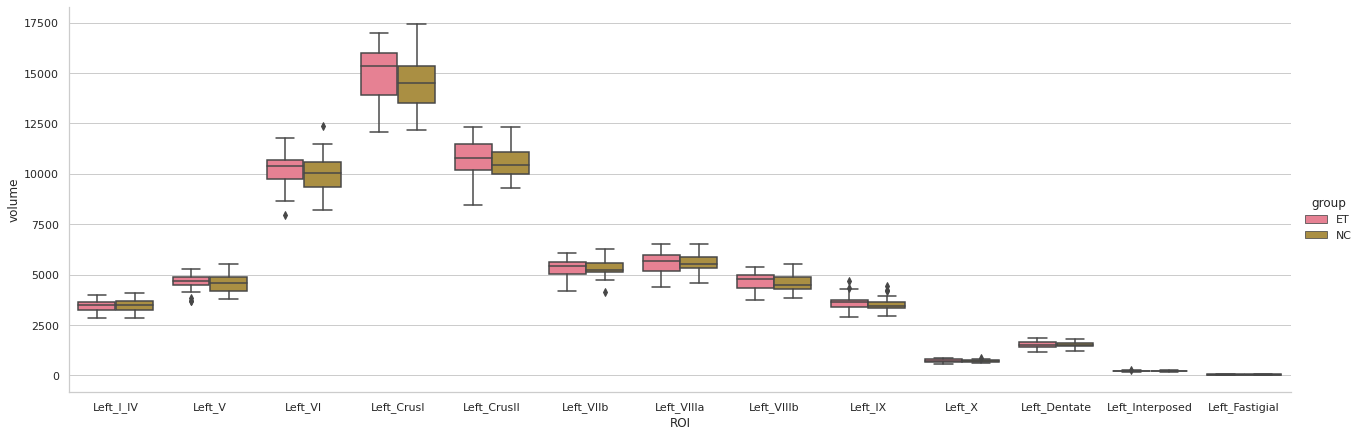

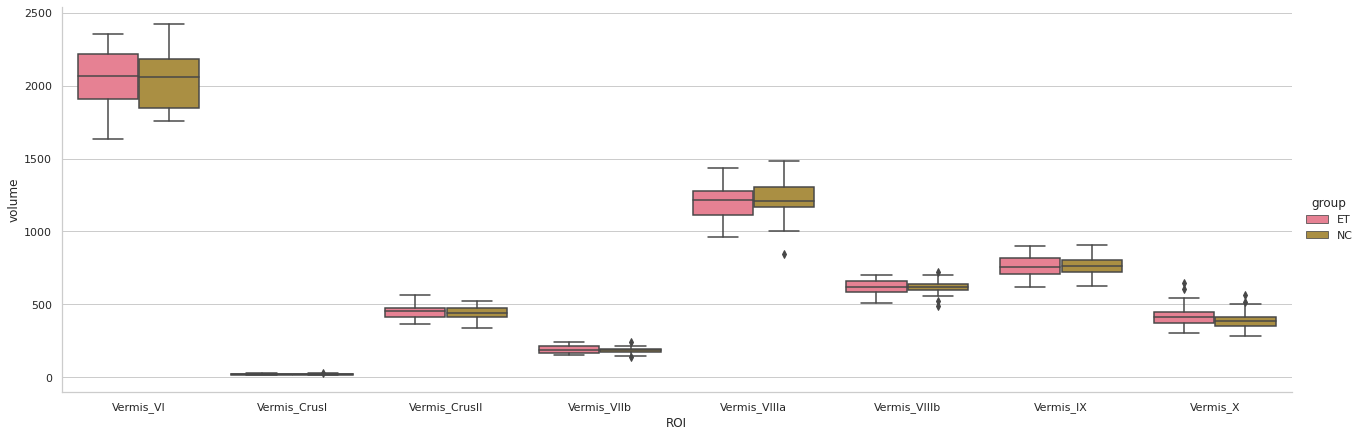

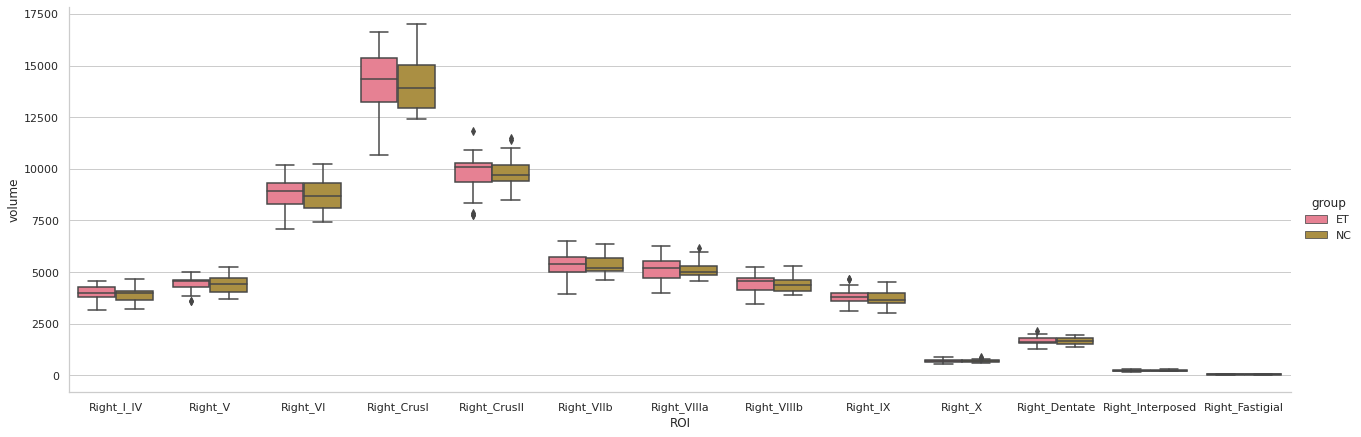

In [5]:
# SUIT lobule results vis
sns.set(font_scale=1)
vis_suit_df=all_data.copy()
vis_suit_df['participant_id']=vis_suit_df.index
palette = sns.color_palette('husl', 6)
with sns.axes_style("whitegrid"):
    plot_l_df = pd.melt(vis_suit_df, id_vars = ['participant_id','group'], value_vars = SUIT_l_labels, 
                      var_name ='ROI', value_name ='volume')
    g = sns.catplot(y='volume', x='ROI', hue='group', kind='box',aspect=3, height=6, palette=palette,
                    data=plot_l_df)
    plot_v_df = pd.melt(vis_suit_df, id_vars = ['participant_id','group'], value_vars = SUIT_v_labels, 
                      var_name ='ROI', value_name ='volume')
    g1 = sns.catplot(y='volume', x='ROI', hue='group', kind='box',aspect=3, height=6, palette=palette,
                    data=plot_v_df)
    plot_r_df = pd.melt(vis_suit_df, id_vars = ['participant_id','group'], value_vars = SUIT_r_labels, 
                      var_name ='ROI', value_name ='volume')
    g2 = sns.catplot(y='volume', x='ROI', hue='group', kind='box',aspect=3, height=6, palette=palette,
                    data=plot_r_df)

In [6]:
#generate the indicator variables for diagnosis and sex
#reading freesurfer results
def eqStr(x, str_y):
    if x == str_y:
        return 1
    else:
        return 0
tab_data = all_data.copy();
tab_data["is_PD"]     = [eqStr(x, "PD") for x in tab_data["group"]];
tab_data["is_ET"]     = [eqStr(x, "ET") for x in tab_data["group"]];
tab_data["is_NC"]     = [eqStr(x, "NC") for x in tab_data["group"]];
tab_data["is_Male"]   = [eqStr(x, "M") for x in tab_data["sex"]];
tab_data["is_Female"] = [eqStr(x, "F") for x in tab_data["sex"]];
tab_data=tab_data.rename(index=dict(zip(tab_data.index, [x.replace('-','_') for x in tab_data.index])),
                         columns=dict(zip(tab_data.columns, [x.replace('-','_') for x in tab_data.columns])),)
print(tab_data.columns)

Index(['age', 'sex', 'Left_Lateral_Ventricle', 'Left_Inf_Lat_Vent',
       'Left_Cerebellum_White_Matter', 'Left_Cerebellum_Cortex',
       'Left_Thalamus_Proper', 'Left_Caudate', 'Left_Putamen', 'Left_Pallidum',
       ...
       'MDTB_7', 'MDTB_8', 'MDTB_9', 'MDTB_10', 'MDTB_total', 'is_PD', 'is_ET',
       'is_NC', 'is_Male', 'is_Female'],
      dtype='object', length=787)


PD 0
ET 38
NC 32


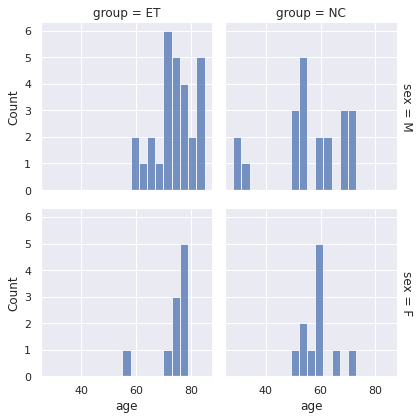

In [7]:
#plot age/sex/diagnosis distributions 2*3
for x in GROUPS:
    print(x , len(tab_data[tab_data["group"]==x]))
sns.set_theme(style="darkgrid")
sns.displot(
    tab_data, x="age", col="group", row="sex", 
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [8]:
#save data
tab_data.to_csv(res_file)

In [9]:
#descriptive statistics of subjects
import numpy as np
import statsmodels.stats.weightstats as ws
import scipy.stats

demo_df=tab_data[["age","group","sex"]];

# 1. reporrt sex
et_m=demo_df[(demo_df['group']=='ET')&(demo_df['sex']=='M')].shape[0];
et_f=demo_df[(demo_df['group']=='ET')&(demo_df['sex']=='F')].shape[0];
nc_m=demo_df[(demo_df['group']=='NC')&(demo_df['sex']=='M')].shape[0];
nc_f=demo_df[(demo_df['group']=='NC')&(demo_df['sex']=='F')].shape[0];

print('ET Male/Female: ', et_m, '/', et_f)
print('NC Male/Female: ', nc_m, '/', nc_f)

# 2. report age mean and std
print("Group age mean:"); display(demo_df.groupby(['group']).mean())
print("Group age standard deviation:");display(demo_df.groupby(['group']).std())

# 3. chi2 tests for sex
print('chisqure test for ET and NC sex (chisq, pval):')
chisq, chi_pval = scipy.stats.chi2_contingency([[et_m, et_f], [nc_m, nc_f]])[:2]
print('\tResults are: ','chisq =%.4f, pvalue = %.4f'%(chisq, chi_pval))

# 4. t tests for age
print('Independent t test for ET and NC age (tstat, pval, df):')
t_stat,t_pval,t_df=ws.ttest_ind(demo_df[demo_df['group']=='ET']['age'], demo_df[demo_df['group']=='NC']['age'],
                                alternative='two-sided', usevar='pooled')
print('\tResults are: ','tstat =%.4f, pvalue = %.4f, df = %i'%(t_stat, t_pval, t_df))

ET Male/Female:  28 / 10
NC Male/Female:  21 / 11
Group age mean:


,age
group,
ET,73.394737
NC,56.312500


Group age standard deviation:


,age
group,
ET,6.965317
NC,11.093263


chisqure test for ET and NC sex (chisq, pval):
	Results are:  chisq =0.2220, pvalue = 0.6375
Independent t test for ET and NC age (tstat, pval, df):
	Results are:  tstat =7.8386, pvalue = 0.0000, df = 68
